In [5]:
import cv2 as cv
import numpy as  np 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


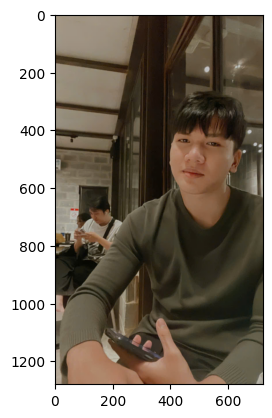

In [6]:
img = cv.imread('D:\DoAn1212\quynh1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN() 

results = detector.detect_faces(img)

print(results)

[{'box': [392, 351, 204, 267], 'confidence': np.float64(0.9946501851081848), 'keypoints': {'nose': [np.int64(479), np.int64(502)], 'mouth_right': [np.int64(516), np.int64(555)], 'right_eye': [np.int64(545), np.int64(450)], 'left_eye': [np.int64(447), np.int64(437)], 'mouth_left': [np.int64(440), np.int64(540)]}}, {'box': [117, 664, 57, 62], 'confidence': np.float64(0.9908473491668701), 'keypoints': {'nose': [np.int64(125), np.int64(707)], 'mouth_right': [np.int64(147), np.int64(712)], 'right_eye': [np.int64(139), np.int64(685)], 'left_eye': [np.int64(125), np.int64(693)], 'mouth_left': [np.int64(137), np.int64(718)]}}]


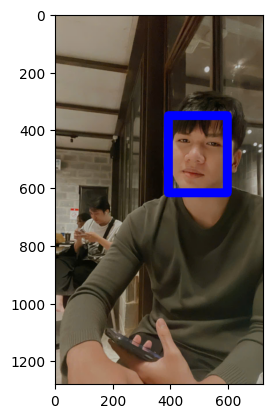

In [8]:
x, y, w, h = results[0]['box']
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

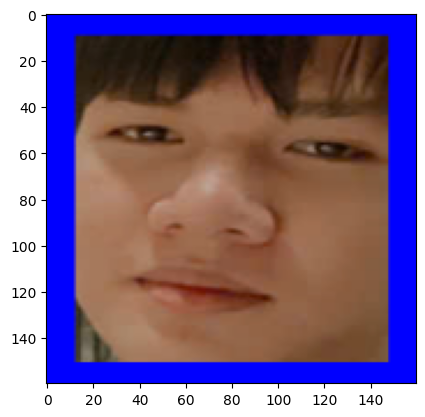

In [9]:
my_face  = img[y: y +h, x:x+w]
my_face  = cv.resize(my_face, (160,160))
plt.imshow(my_face)

Automate the preprocessing

In [17]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        try:
            img = cv.imread(filename)
            if img is None:
                raise Exception("Image not found or cannot be read.")
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            faces = self.detector.detect_faces(img)
            if len(faces) == 0:
                raise Exception("No face detected.")
            x, y, w, h = faces[0]['box']
            x, y = abs(x), abs(y)
            face = img[y:y+h, x:x+w]
            face_arr = cv.resize(face, self.target_size)
            return face_arr
        except Exception as e:
            print(f"Error processing file {filename}: {e}")
            return None

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)
                print(f"Processing image: {path}")
                single_face = self.extract_face(path)
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                print(f"Error processing image {im_name}: {e}")
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            print(f"Processing directory: {path}")
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)


faceloading = FACELOADING("D:/DoAn1212/data")
X, Y = faceloading.load_classes()


Processing directory: D:/DoAn1212/data\DuyKhang
Processing image: D:/DoAn1212/data\DuyKhang\100.png
Processing image: D:/DoAn1212/data\DuyKhang\101.png
Processing image: D:/DoAn1212/data\DuyKhang\102.png
Processing image: D:/DoAn1212/data\DuyKhang\103.png
Processing image: D:/DoAn1212/data\DuyKhang\104.png
Processing image: D:/DoAn1212/data\DuyKhang\105.png
Processing image: D:/DoAn1212/data\DuyKhang\106.png
Processing image: D:/DoAn1212/data\DuyKhang\107.png
Processing image: D:/DoAn1212/data\DuyKhang\108.png
Processing image: D:/DoAn1212/data\DuyKhang\109.png
Processing image: D:/DoAn1212/data\DuyKhang\110.png
Processing image: D:/DoAn1212/data\DuyKhang\111.png
Processing image: D:/DoAn1212/data\DuyKhang\112.png
Processing image: D:/DoAn1212/data\DuyKhang\113.png
Processing image: D:/DoAn1212/data\DuyKhang\114.png
Processing image: D:/DoAn1212/data\DuyKhang\115.png
Processing image: D:/DoAn1212/data\DuyKhang\116.png
Processing image: D:/DoAn1212/data\DuyKhang\117.png
Processing image

In [18]:
from keras_facenet import FaceNet

embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') #3D(160,160,3)
    face_img = np.expand_dims(face_img, axis =0)
    #4D (Nonex160x11160x3)
    yhat = embedder.embeddings(face_img)
    return yhat[0] #512D imgae (1x1x512)


In [19]:
EMBEDDED_X = []
for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━

Save model 

In [20]:
np.savez_compressed('faces_embdedings_done_4classes.npz', EMBEDDED_X, Y)

SVM model 

In [41]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y

array([ 0,  0,  0, ..., 12, 12, 12])

In [59]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
import pickle
est = train_test_split(EMBEDDED_X, Y, shuffle = True, random_state = 17)
model = SVC(kernel='linear', probability = True)
model.fit(X_train, Y_train)


#SAVE MODEL
with open("svm_model_160x160.pkl", "wb") as file:
    pickle.dump(model, file)
print("Model saved successfully!")




Model saved successfully!


In [44]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train , ypreds_train)

0.9992334227673438

In [46]:
accuracy_score(Y_test, ypreds_test)

0.9994252873563219

Kiem thu model


In [13]:
t_im = cv.imread('D:\DoAn1212\quynh.jpg')
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h =detector.detect_faces(t_im) [0]['box']

NameError: name 'detector' is not defined

In [54]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [55]:
test_im = [test_im]
ypreds = model.predict(test_im)


In [56]:
ypreds

array([3])

In [57]:
encoder.inverse_transform(ypreds)

array([3])

In [14]:
# face recognition part II
#IMPORT
import cv2 as cv
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pickle
from keras_facenet import FaceNet

#INITIALIZE
facenet = FaceNet()
faces_embeddings = np.load('faces_embdedings_done_4classes.npz')
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)

# Đảm bảo đường dẫn tới file haarcascade đúng
haarcascade_path = r'C:\Users\ADMIN\anaconda3\envs\mypj\Lib\site-packages\cv2\data\haarcascade_frontalface_default .xml'
haarcascade = cv.CascadeClassifier(haarcascade_path)
model = pickle.load(open('svm_model_160x160.pkl', 'rb'))

cap = cv.VideoCapture(0)

# WHILE LOOP
while cap.isOpened():
    _, frame = cap.read()
    rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)
    for x, y, w, h in faces:
        img = rgb_img[y:y+h, x:x+w]
        img = cv.resize(img, (160, 160)) # 1x160x160x3
        img = np.expand_dims(img, axis=0)
        ypred = facenet.embeddings(img)
        face_name = model.predict(ypred)
        final_name = encoder.inverse_transform(face_name)[0]
        cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 10)
        cv.putText(frame, str(final_name), (x, y-10), cv.FONT_HERSHEY_SIMPLEX,
                   1, (0, 0, 255), 3, cv.LINE_AA)

    cv.imshow("Face Recognition:", frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━

In [89]:
import os
if not os.path.isfile('D:\DoAn1212\haarcascade_frontalface_default (6).xml'):
    print("File haarcascade_frontalface_default.xml không tồn tại.")
